# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 40.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [3]:
pip install country_converter --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.1 MB/s eta 0:00:00


In [4]:
#% pip install iso3166

In [5]:
import numpy as np #Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

# Import libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# These might be helpful:
import iso3166 as iso
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_data.shape

(4324, 9)

In [9]:
print(f'It has {df_data.shape[0]} rows and {df_data.shape[1]} columns')

It has 4324 rows and 9 columns


In [10]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [12]:
df_data.count()

,0
Unnamed: 0.1,4324
Unnamed: 0,4324
Organisation,4324
Location,4324
Date,4324
Detail,4324
Rocket_Status,4324
Price,964
Mission_Status,4324


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [13]:
print(f'Any NaN values ? {df_data.isna().values.any()}')

Any NaN values ? True


In [14]:
print(f'Any duplicate values ? {df_data.duplicated().values.any()}')

Any duplicate values ? False


In [15]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [16]:
# df_data = df_data.dropna()

In [17]:
df_data = df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [18]:
df_data.shape

(4324, 7)

## Descriptive Statistics

In [19]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Aug 28, 1990 09:05 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [20]:
# check missing data

total_of_all = df_data.isnull().sum().sort_values(ascending=False)
percent_of_all = (df_data.isnull().sum() / df_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_of_all, percent_of_all], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Price,3360,0.78
Location,0,0.00
Organisation,0,0.00
Date,0,0.00
Detail,0,0.00


In [21]:
# handle missing values

df_data['Price'] = df_data['Price'].fillna(0)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [22]:
df_data.shape

(4324, 7)

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [23]:
missions = df_data["Organisation"].value_counts().reset_index()[:25]
missions

,Organisation,count
0,RVSN USSR,1777
1,Arianespace,279
2,General Dynamics,251
3,CASC,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [24]:
fig = go.Figure(go.Bar(x = missions["Organisation"],
                       y = missions["count"],
                       marker = dict( color = missions["count"],
                                    colorscale = "bluered")))
fig.update_layout(title = "Number of Launches Per Company", xaxis_title = "Top 25 Countries", yaxis_title = "count", hovermode = "x")
fig.show()

# Success and Failure Percentage of each Organisation's Space Mission

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df_data['Mission_Status'])
colors = {0 : 'Blue', 1 : 'Yellow', 2 : 'Red', 3 : 'Green'}


In [26]:
fig = make_subplots(rows = 4 ,cols = 4,subplot_titles=df_data['Organisation'].unique())
for i, organisation in enumerate(df_data['Organisation'][:16].unique()):
    counts = df_data[df_data['Organisation'] == organisation]['Mission_Status'].value_counts(normalize = True) * 100
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x = counts.index, y = counts.values, name = organisation,showlegend=False,marker={'color' : color})
    fig.add_trace(trace, row = (i//4)+1, col = (i%4)+1)
fig.update_layout(template = 'plotly_dark',margin=dict(l=80, r=80, t=50, b=10),
                  title = { 'text' : '<b>Organisations and Mission Status</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#cacaca',height = 1000,width = 1100)
for i in range(1,5):
    fig.update_yaxes(title_text = 'Percentage',row = i, col = 1)
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [27]:
status = df_data['Rocket_Status'].value_counts().reset_index()
status

,Rocket_Status,count
0,StatusRetired,3534
1,StatusActive,790


In [28]:
fig = px.bar(status, x = "Rocket_Status", y = "count", color = "Rocket_Status", title = "Rocket Status")
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [29]:
mission_stat = df_data.Mission_Status.value_counts().reset_index()
mission_stat

,Mission_Status,count
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [30]:
fig = px.pie(mission_stat, names = "Mission_Status", values = "count", color = "Mission_Status", title = "Distribution of Mission Status")
fig.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [31]:
fig = px.histogram(df_data, x="Mission_Status", y="Price", color="Mission_Status")

fig.update_layout(
    title_text='Cost of Launches in USD millions',
    xaxis_title_text='Mission Status',
    yaxis_title_text='Price',
    bargap=0.2,
    bargroupgap=0.1
)

fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

* Use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


Use the iso3166 package to convert the country names to Alpha3 format.

In [32]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True, title= "Choropleth map Showing number of Launches by Country", title_x=0.5)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [33]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True, title= "Choropleth map Showing number of Failures by Country", title_x=0.5)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [34]:
country_org_miss = df_data.groupby(by=['Country',
                                       'Organisation',
                                       'Mission_Status'], as_index=False).agg({'Price':pd.Series.count})

country_org_miss = country_org_miss.sort_values('Price', ascending=False)
country_org_miss

,Country,Organisation,Mission_Status,Price
72,RUS,RVSN USSR,Success,1614
19,FRA,Arianespace,Success,267
9,CHN,CASC,Success,231
96,USA,General Dynamics,Success,203
81,RUS,VKS RF,Success,188
...,...,...,...,...
109,USA,Sandia,Failure,1
114,USA,ULA,Partial Failure,1
112,USA,SpaceX,Prelaunch Failure,1
120,USA,US Navy,Partial Failure,1


In [70]:
burst = px.sunburst(country_org_miss,
                    path=['Country','Organisation','Mission_Status'],
                    values='Price',
                    title='Sunburst Chart of the countries, organisations,'
                    ' and mission status',)

burst.update_layout(xaxis_title='Prices',
                    yaxis_title='Country',
                    title_x=0.5,
                    coloraxis_showscale=False,
                    width=1000,
                    height=800,
                    margin=dict(t=50, l=25, r=25, b=25)
                    )

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [36]:
money_spent = df_data.groupby('Organisation').agg({'Price':pd.Series.count})
money_spent = money_spent.sort_values('Price', ascending=False)
money_spent

,Price
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


In [37]:
h_bar = px.bar(x=money_spent.index,
               y=money_spent.Price,
               color=money_spent.Price,
               color_continuous_scale='Viridis',
               title='Total Amount of Money Spent by Organisations on Space Missions',
               )

h_bar.update_layout(xaxis_title='Organisation',
                    yaxis_title='Price',
                    title_x=0.5,
                    coloraxis_showscale=False)
h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [38]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce').fillna(0)

In [39]:
df_data['Price'] = df_data['Price'].astype(np.int64)

In [40]:
money = df_data.groupby(['Organisation'])['Price'].sum()
starts = df_data['Organisation'].value_counts().reset_index()
starts.columns = ['Organisation', 'count']

av_money_df = pd.merge(money, starts, on='Organisation')
av_money_df['avg'] = av_money_df['Price'] / av_money_df['count']
av_money_df = av_money_df[av_money_df['avg']>0]
av_money_df = av_money_df.reset_index()
av_money_df.sort_values(['avg'], ascending = False, inplace=True)

fig = px.bar(
    av_money_df,
    x='Organisation',
    y='avg',
    color = 'avg',
    orientation='v',
    color_continuous_scale=px.colors.sequential.Viridis_r
)
fig.update_layout(title='Average money per one launch', title_x=0.5,
                  xaxis_title = 'Organisations', yaxis_title = 'Money Spent per Launch')
fig.update_xaxes(tickangle=60)
fig.show()

In [41]:
av_money_df.head(2)

,index,Organisation,Price,count,avg
14,35,NASA,61200,203,301.48
20,48,ULA,14798,140,105.70


# Chart the Number of Launches per Year

In [42]:
df_data["Year"] = df_data["Date"].str.split(", ").str[-1].str[0:4].astype(str).astype(int)

In [43]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           4324 non-null   int64 
 6   Mission_Status  4324 non-null   object
 7   Country         4324 non-null   object
 8   Year            4324 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [44]:
launches_per_year = df_data.groupby('Year').agg({'Year':pd.Series.count})
launches_per_year.head()

,Year
Year,
1957,3
1958,28
1959,20
1960,39
1961,52


In [45]:
launches = launches_per_year.rename(columns={"Year": "Launches_Per_Year"}).reset_index()
launches.head()
#no_of_launch.head()

,Year,Launches_Per_Year
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


In [67]:
launches_per_year_bar = px.bar(
                              launches,
                              x='Year',
                              y='Launches_Per_Year',
                              color=launches.index,
                              orientation='v',
                              )

launches_per_year_bar.update_layout(title='Number of Launches per Year', title_x=0.5,
                                    xaxis_title='Year',
                            yaxis_title='No_of_launches')
launches_per_year_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [47]:
df_data["Month"] = df_data["Date"].str.split(", ").str[0].str[4:7].astype(str)

In [48]:
df_data.sample(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
3268,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Feb 03, 1972 08:40 UTC",Voskhod | Cosmos 473,StatusRetired,0,Success,RUS,1972,Feb


In [49]:
# Converted the date to the datetime object, then extracted the month from the datetime object.
df_data["Month"] = df_data["Date"].str.split(", ").str[0].str[4:7].astype(str)

# Count the number of times the same month is mentioned.
ds = df_data['Month'].value_counts().reset_index()
ds.columns = [
    'Month',
    'count'
]
# Passing the month and the count to the bar graph.
fig = px.bar(
    ds,
    x='Month',
    y="count",
    color='Month',
    orientation='v',
#     width=800
)

fig.update_layout(title='Missions number by month', title_x=0.5
                  )

fig.show()

# December has the most launches of all time.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [50]:
#Most popular month
most_popular_month = ds.head(1)
print(f'The most popular month is {most_popular_month["Month"].iloc[0]}')

The most popular month is Dec


In [51]:
#Least popular month
least_polular_month = ds.tail(1)
print(f'The least popular month is {least_polular_month["Month"].iloc[0]}')

The least popular month is Jan


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

<Axes: xlabel='Year'>

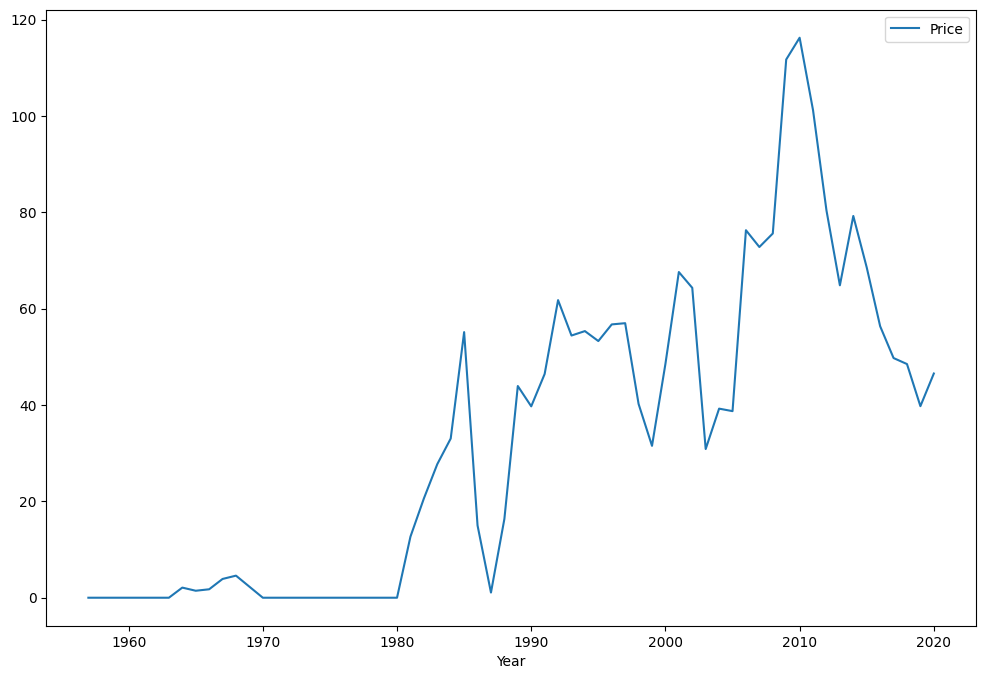

In [52]:
avg_price = df_data[df_data["Price"].notna()]
pd.options.mode.chained_assignment = None
avg_price["Price"] = avg_price["Price"].astype(float)
avg_price['Year'] = pd.to_numeric(avg_price['Year'])

avg_price['Year'] = pd.to_numeric(df_data['Year'], errors='coerce'). fillna(0)

avg_price['Year'].astype(str).astype(int)

avg_price.groupby("Year").mean(numeric_only=True).plot(figsize=(12, 8))

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [53]:
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,USA,2020,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29,Success,CHN,2020,Aug


In [68]:
# Count the number of times the same Organisation is mentioned.
top_10 = df_data['Organisation'].value_counts().reset_index()
top_10.columns = [
    'Organisation',
    'count'
]
top_10 = top_10[:10]
# Passing the Organisation and the count to the bar graph.
fig = px.bar(
    top_10,
    x='Organisation',
    y="count",
    color='Organisation',
    orientation='v'
)

fig.update_layout(title='Top 10 Organisations', title_x=0.5
                  )
fig.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [55]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]
df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

space_race = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
USA_vs_USSR = space_race[:2]
USA_vs_USSR

,Country,counts
0,RUS,2099
1,USA,1351


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [56]:
fig = px.pie(values=USA_vs_USSR.counts, names=USA_vs_USSR.Country)
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [57]:
df_data["Year"] = df_data["Date"].str.split(", ").str[-1].str[0:4].astype(str).astype(int)

<Axes: xlabel='Year'>

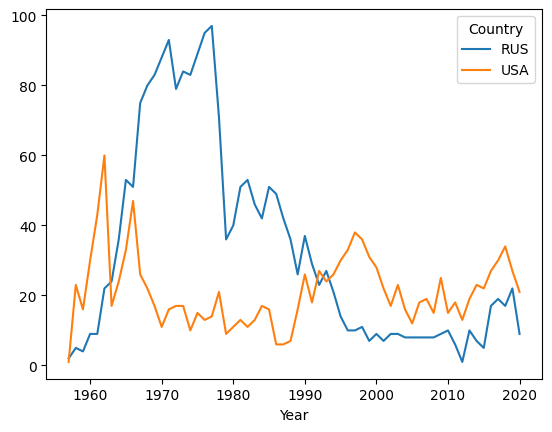

In [58]:
Launches = df_data[(df_data["Country"]=='USA') | (df_data["Country"]=='RUS')]

Launches.groupby(['Year', 'Country']).size().unstack().plot()

## Chart the Total Number of Mission Failures Year on Year.

In [69]:
mission = df_data[df_data['Mission_Status'].str.contains('Failure')]
fig = px.sunburst(mission, path=['Year', 'Mission_Status'])
fig.update_traces(textinfo='label+value')
fig.update_layout(
    width=1000,
    height=800,
    margin=dict(t=50, l=25, r=25, b=25)
)
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [88]:
mission_group = df_data.groupby(['Year', 'Mission_Status'])['Mission_Status'].count().reset_index(name='counts')

# Step 2: Pivot to get counts of each status per year
pivot_df = mission_group.pivot(index='Year', columns='Mission_Status', values='counts').fillna(0)
pivot_df['Total'] = pivot_df.sum(axis=1)

pivot_df['Failure_Percentage'] = (pivot_df.get('Failure', 0) / pivot_df['Total']) * 100

failure_percent_df = pivot_df[['Failure_Percentage']].reset_index()

failure_percent_df

Mission_Status,Year,Failure_Percentage
0,1957,33.33
1,1958,71.43
2,1959,45.00
3,1960,51.28
4,1961,32.69
...,...,...
59,2016,2.22
60,2017,6.52
61,2018,1.71
62,2019,5.50


In [85]:
fig = px.line(failure_percent_df, x='Year', y='Failure_Percentage', title='Percentage of Failures over Time')
fig.update_layout(
                  xaxis_title='Year',
                  yaxis_title='Percentage of Failures',
                  title_x=0.5)
fig

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)


In [61]:
# Group by Year and Country, summing the counts
country_launches = df_data.groupby("Year")['Country'].value_counts().rename_axis(["Year", "Country"]).reset_index(name='counts')

yearly_launches = country_launches.groupby(["Year", "Country"])["counts"].sum().reset_index()
leading_countries_per_year = yearly_launches.loc[yearly_launches.groupby("Year")["counts"].idxmax()].reset_index(drop=True)
leading_countries_per_year = leading_countries_per_year.sort_values("Year").reset_index(drop=True)
leading_countries_per_year


,Year,Country,counts
0,1957,RUS,2
1,1958,USA,23
2,1959,USA,16
3,1960,USA,30
4,1961,USA,43
...,...,...,...
59,2016,USA,27
60,2017,USA,30
61,2018,CHN,39
62,2019,CHN,33


## Do the results change if we only look at the number of successful launches?

In [89]:
mission = df_data[df_data['Mission_Status'].str.contains('Success')]
country_launches = mission.groupby("Year")['Country'].value_counts().rename_axis(["Year", "Country"]).reset_index(name='counts')


yearly_launches = country_launches.groupby(["Year", "Country"])["counts"].sum().reset_index()
successful_launches_per_year = yearly_launches.loc[yearly_launches.groupby("Year")["counts"].idxmax()].reset_index(drop=True)
successful_launches_per_year = leading_countries_per_year.sort_values("Year").reset_index(drop=True)
successful_launches_per_year

,Year,Country,counts
0,1957,RUS,2
1,1958,USA,5
2,1959,USA,6
3,1960,USA,16
4,1961,USA,27
...,...,...,...
59,2016,USA,26
60,2017,USA,30
61,2018,CHN,38
62,2019,CHN,31


In [100]:
# Do the results change if we only look at the number of successful launches?
# Compare values

comparison = leading_countries_per_year.Country == successful_launches_per_year.Country

print("Number of matches:", comparison.sum())
print("Number of mismatches:", (~comparison).sum())

#print("Comparison (True = match, False = mismatch):\n", comparison)

Number of matches: 64
Number of mismatches: 0


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

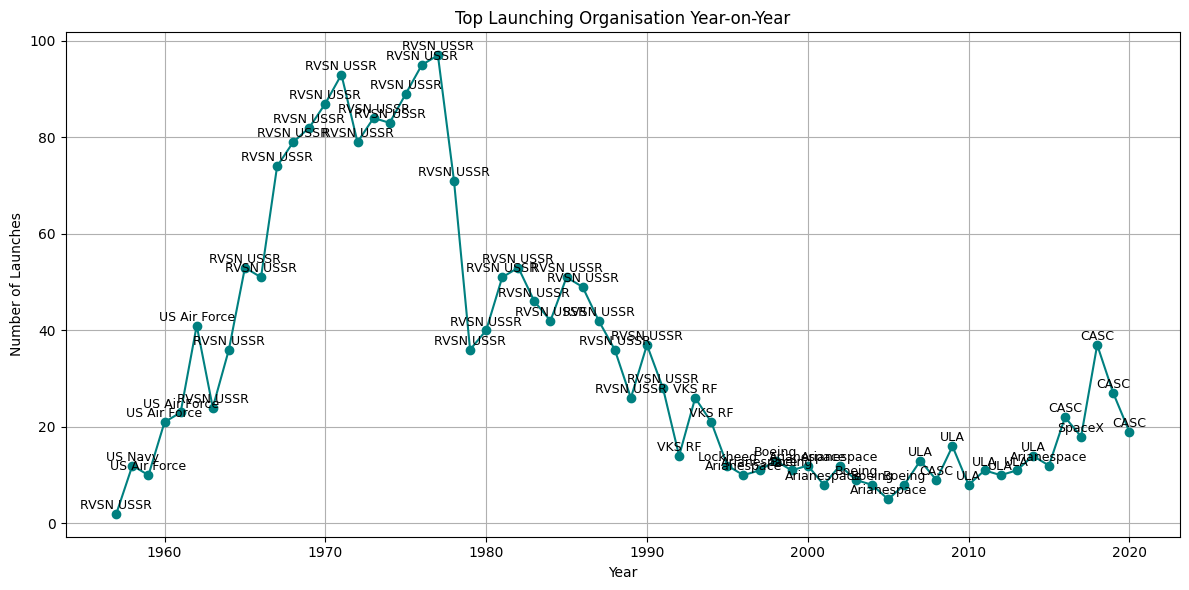

In [63]:
# 1. Group by Year and Organisation, summing counts
country_launches = df_data.groupby("Year")['Organisation'].value_counts().rename_axis(["Year", "Organisation"]).reset_index(name='counts')
yearly_org_launches = country_launches.groupby(["Year", "Organisation"])["counts"].sum().reset_index()

# 2. Get the top organisation per year
top_orgs_per_year = yearly_org_launches.loc[yearly_org_launches.groupby("Year")["counts"].idxmax()].reset_index(drop=True)

# 3. Plotting
plt.figure(figsize=(12, 6))
plt.plot(top_orgs_per_year["Year"], top_orgs_per_year["counts"], marker='o', linestyle='-', color='teal')

# Annotate with organisation names
for i, row in top_orgs_per_year.iterrows():
    plt.text(row["Year"], row["counts"] + 1, row["Organisation"], ha='center', fontsize=9)

plt.title("Top Launching Organisation Year-on-Year")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
# Group data by Year and Organisation
country_launches = df_data.groupby("Year")['Organisation'].value_counts().rename_axis(["Year", "Organisation"]).reset_index(name='counts')

org_launches = country_launches.groupby(["Year", "Organisation"])["counts"].sum().reset_index()

# Dominant organisation in 1970s and 1980s
seventies_eighties = org_launches[(org_launches["Year"] >= 1970) & (org_launches["Year"] <= 1989)]

# Group by organisation and sum counts
dominant_70s_80s = seventies_eighties.groupby("Organisation")["counts"].sum().reset_index()

# Get the organisation with the highest total
dominant_70s_80s = dominant_70s_80s.sort_values(by="counts", ascending=False).reset_index(drop=True)
print("Dominant organisation in the 1970s and 1980s:")
print(dominant_70s_80s.head(1))

# Dominant organisation in 2018, 2019, 2020
recent_years = org_launches[org_launches["Year"].isin([2018, 2019, 2020])]

# Group by organisation and sum counts
dominant_recent = recent_years.groupby("Organisation")["counts"].sum().reset_index()

# Get the organisation with the highest total
dominant_recent = dominant_recent.sort_values(by="counts", ascending=False).reset_index(drop=True)
print("\nDominant organisation in 2018, 2019, and 2020:")
print(dominant_recent.head(1))


Dominant organisation in the 1970s and 1980s:
  Organisation  counts
0    RVSN USSR    1250

Dominant organisation in 2018, 2019, and 2020:
  Organisation  counts
0         CASC      83
